In [1]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
import time
import pi_estimate.distance as dis

In [2]:
points = [100, 1000, 10000, 1000000]
pi_from_random = []
cal_time = []

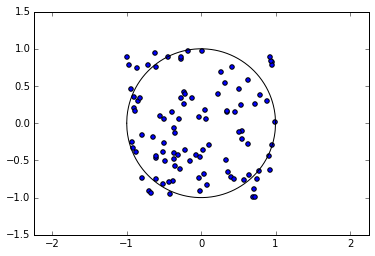

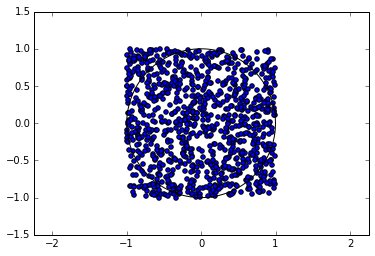

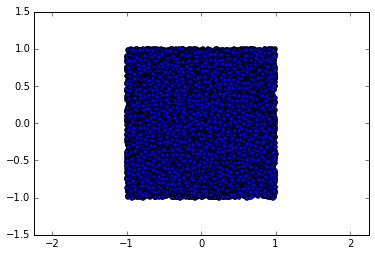

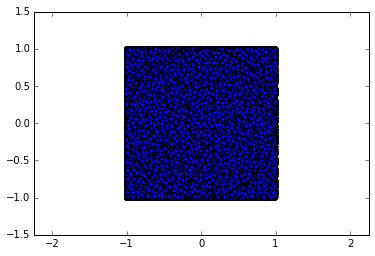

[100, 1000, 10000, 1000000]
[3.12, 3.108, 3.11, 3.142624]
[0.00017309188842773438, 0.0005450248718261719, 0.007230997085571289, 0.5671780109405518]


In [3]:
for num in points:
    start = time.time()
    x_random = np.array( [2. * random.random() - 1. for i in range(num)] )
    y_random = np.array( [2. * random.random() - 1. for i in range(num)] )
    distance_random = dis.distance(x_random, y_random)
    sel = distance_random < 1.
    pi_from_random.append(float(len(distance_random[sel]))/num * 4.)
    end = time.time()
    cal_time.append(end - start) #unit: seconds
    
    x = np.linspace(-1., 1., 500)
    plt.plot(x, np.sqrt(1. - x**2.), c = 'k' )
    plt.plot(x, -np.sqrt(1. - x**2.), c = 'k' )
    plt.scatter(x_random, y_random)
    plt.axis('equal')
    plt.show()
print(points)
print(pi_from_random)
print(cal_time)

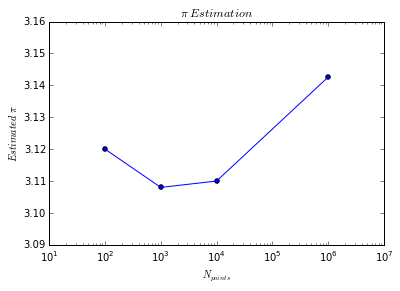

In [4]:
plt.scatter(points, pi_from_random)
plt.plot(points, pi_from_random)
plt.xscale('log')
plt.xlabel(r'$N_{points}$')
plt.ylabel(r'$Estimated\ \pi$')
plt.title(r'$\pi\ Estimation$')
plt.show()

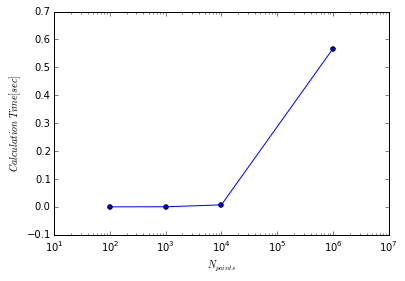

In [5]:
plt.scatter(points, cal_time)
plt.plot(points, cal_time)
plt.xscale('log')
plt.xlabel(r'$N_{points}$')
plt.ylabel(r'$Calculation\ Time[sec]$')
plt.show()

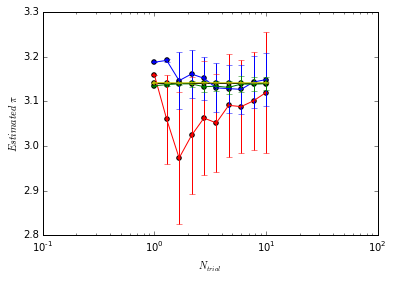

In [13]:
N = np.logspace(0., 1., 10)
c = ['r', 'b', 'g', 'y']
count = 0
for num in points:
    mean = []
    std = []
    pi_from_random = []
    for n_pre in N:
        for k in xrange(int(n_pre)):
            x_random = np.array( [2. * random.random() - 1. for i in range(num)] )
            y_random = np.array( [2. * random.random() - 1. for i in range(num)] )
            distance_random = dis.distance(x_random, y_random)
            sel = distance_random < 1.
            pi_from_random.append(float(len(distance_random[sel]))/num * 4.)
        mean.append(np.mean(np.array(pi_from_random)))
        std.append(np.std(np.array(pi_from_random)))
    plt.scatter(N, mean, c = c[count])
    plt.errorbar(N, mean, yerr = std, c = c[count], label = '%d' % num)
    count += 1
plt.xscale('log')
plt.xlabel(r'$N_{trial}$')
plt.ylabel(r'$Estimated\ \pi$')
plt.hlines(np.pi, N[0], N[-1])
#plt.legend(loc=4)
plt.show()
        

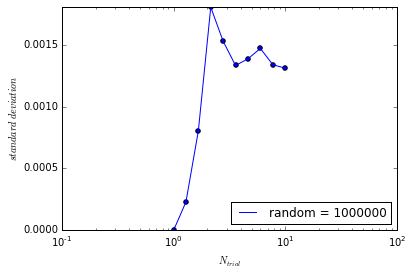

In [14]:
#print N
#plt.plot(N, 0.01 * 1./np.sqrt(N))
plt.plot(N, std, label = 'random = %d' % points[-1])
plt.scatter(N, std)
plt.xlabel(r'$N_{trial}$')
plt.ylabel(r'$standard\ deviation$')
plt.ylim(0., np.amax(std)  )
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc=4)
plt.show()
